In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import scipy.stats as st
import csv
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime

file_to_output = os.path.join("project-1", "output.csv")

In [2]:
#URL Bases and Filters
url = "https://www.fema.gov/api/open/v2/HazardMitigationGrantProgramDisasterSummaries"
urlv1 = "https://www.fema.gov/api/open/v1/FemaWebDisasterSummaries"
urlv2 ="https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"


filters1 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Severe Storm'"
filters2 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and (incidentType eq 'Hurricane' or incidentType eq 'Typhoon')" 
filters3 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Fire'" 
filters4 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Flood'" 
filters5 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and (incidentType eq 'Severe Ice Storm' or incidentType eq 'Snow Storm' or incidentType eq 'Winter Storm' or incidentType eq 'Freezing' or incidentType eq 'Coastal Storm' or incidentType eq 'Tropical Storm')"


In [3]:
# Send a GET request to the API
response1 = requests.get(f"{url}?{filters1}")
response1

<Response [200]>

In [4]:
# Check if the request was successful
if response1.status_code == 200:
    # Parse the JSON data
    data = response1.json()
    
    # Extract the list of disaster declarations
    #disasters = data.get('DisasterDeclarationsSummaries', [])
    #disasters = data.get('FemaWebDisasterSummaries',[])
    disasters = data.get('HazardMitigationGrantProgramDisasterSummaries',[])
    
    # Create a DataFrame from the list of disaster records
    severe_df = pd.DataFrame(disasters)
    severe_df = severe_df.iloc[:, [0,1,2,3,4,5,6,8,10,13,23,24,25,26,27,28,29,31]]
    # Display the DataFrame
    severe_df
else:
    print(f"Error: {response1.status_code}")

# Convert declarationDate to datetime
severe_df['declarationDate'] = pd.to_datetime(severe_df['declarationDate'])

# Create a new column with the desired format
severe_df['Year'] = severe_df['declarationDate'].dt.strftime('%Y')


severe_df

,disasterNumber,declarationDate,disasterType,incidentType,title,region,state,hmgpCloseoutStatus,hmgpReconciliationDate,hmgpPopEndDate,obligatedTotalAmount,obligatedInitiativeAmount,obligatedPlanningAmount,obligatedRegularAmount,obligatedRecipientAdmin,obligatedSubrecipientAdmin,obligatedRecipientMgmtAmt,pendingProjectsQuantity,Year
0,4162,2014-01-23 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",10,Alaska,Open,None,None,3746768.00,0.0,0.0,3529628.00,0,0,217140.0,0.0,2014
1,1618,2005-12-09 00:00:00+00:00,DR,Severe Storm,"SEVERE FALL STORM, TIDAL SURGES, AND FLOODING",10,Alaska,Closed,2010-06-18T00:00:00.000Z,None,155550.00,0.0,0.0,124826.00,4330,4362,22032.0,0.0,2005
2,4050,2011-12-22 00:00:00+00:00,DR,Severe Storm,SEVERE WINTER STORMS AND FLOODING,10,Alaska,Closed,2017-07-10T00:00:00.000Z,None,227656.00,0.0,0.0,217021.00,0,0,10635.0,0.0,2011
3,4094,2012-11-27 00:00:00+00:00,DR,Severe Storm,"SEVERE STORM, STRAIGHT-LINE WINDS, FLOODING, A...",10,Alaska,Open,None,None,3460326.02,0.0,0.0,3296906.02,0,0,163420.0,0.0,2012
4,4054,2012-02-02 00:00:00+00:00,DR,Severe Storm,SEVERE STORM,10,Alaska,Closed,2017-07-06T00:00:00.000Z,None,182646.00,0.0,0.0,172666.00,0,0,9980.0,0.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1704,2007-05-25 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND INLAND AND COASTAL FLOODING,1,Rhode Island,Closed,2015-09-30T00:00:00.000Z,None,31532.00,0.0,0.0,29437.00,918,1177,0.0,0.0,2007
698,4141,2013-08-08 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, FLOODING, AND MUDSLIDES",5,Wisconsin,Closed,2019-12-19T00:00:00.000Z,None,936757.00,3100.0,50083.0,831191.00,0,0,52383.0,0.0,2013
699,1933,2010-08-11 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",5,Wisconsin,Closed,2020-05-22T00:00:00.000Z,None,11179104.00,68849.0,508837.0,9943871.00,0,0,657547.0,0.0,2010
700,1719,2007-08-26 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND FLOODING,5,Wisconsin,Closed,2014-04-10T00:00:00.000Z,None,3247237.00,93854.0,85192.0,2854522.00,12068,78355,123246.0,0.0,2007


In [5]:
# Send a GET request to the API
response2 = requests.get(f"{url}?{filters5}")
response2

<Response [200]>

In [6]:
# Check if the request was successful
if response2.status_code == 200:
    # Parse the JSON data
    data = response2.json()
    
    # Extract the list of disaster declarations
    #disasters = data.get('DisasterDeclarationsSummaries', [])
    #disasters = data.get('FemaWebDisasterSummaries',[])
    disasters = data.get('HazardMitigationGrantProgramDisasterSummaries',[])
    
    # Create a DataFrame from the list of disaster records
    storm_df = pd.DataFrame(disasters)
    storm_df = storm_df.iloc[:, [0,1,2,3,4,5,6,8,10,13,23,24,25,26,27,28,29,31]]
    # Display the DataFrame
    severe_df
else:
    print(f"Error: {response2.status_code}")

# Convert declarationDate to datetime
storm_df['declarationDate'] = pd.to_datetime(storm_df['declarationDate'])

# Create a new column with the desired format
storm_df['Year'] = storm_df['declarationDate'].dt.strftime('%Y')


storm_df

,disasterNumber,declarationDate,disasterType,incidentType,title,region,state,hmgpCloseoutStatus,hmgpReconciliationDate,hmgpPopEndDate,obligatedTotalAmount,obligatedInitiativeAmount,obligatedPlanningAmount,obligatedRegularAmount,obligatedRecipientAdmin,obligatedSubrecipientAdmin,obligatedRecipientMgmtAmt,pendingProjectsQuantity,Year
0,4244,2015-10-30 00:00:00+00:00,DR,Coastal Storm,SEVERE STORM,10,Alaska,Closed,2021-09-30T00:00:00.000Z,None,130130.29,11497.50,35275.20,54639.59,0,0,28718.00,0.0,2015
1,4100,2013-01-29 00:00:00+00:00,DR,Severe Ice Storm,SEVERE WINTER STORM,6,Arkansas,Closed,2018-11-27T00:00:00.000Z,None,1410234.00,0.00,94000.00,1252313.00,0,0,63921.00,0.0,2013
2,4160,2014-01-06 00:00:00+00:00,DR,Severe Ice Storm,SEVERE WINTER STORM,6,Arkansas,Closed,2018-12-03T00:00:00.000Z,None,795042.57,0.00,55851.00,710082.84,0,0,29108.73,0.0,2014
3,4799,2024-07-10 00:00:00+00:00,DR,Winter Storm,SEVERE WINTER STORM AND FLOODING,1,New Hampshire,Open,None,None,0.00,0.00,0.00,0.00,0,0,0.00,NaN,2024
4,4104,2013-03-05 00:00:00+00:00,DR,Freezing,SEVERE FREEZE,9,Arizona,Closed,2021-04-08T00:00:00.000Z,None,198165.30,0.00,0.00,195615.00,0,0,2550.30,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1509,2004-02-13 00:00:00+00:00,DR,Severe Ice Storm,SEVERE ICE STORM,4,South Carolina,Closed,2011-07-21T00:00:00.000Z,2009-06-15T00:00:00.000Z,980174.00,27085.00,68461.00,583828.00,2715,19046,279039.00,0.0,2004
62,1625,2006-01-20 00:00:00+00:00,DR,Severe Ice Storm,SEVERE ICE STORM,4,South Carolina,Closed,2012-06-25T00:00:00.000Z,None,632542.00,39232.00,33730.00,423319.00,695,15277,120289.00,0.0,2006
63,1676,2007-01-15 00:00:00+00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,7,Missouri,Closed,2014-05-13T00:00:00.000Z,2013-04-01T00:00:00.000Z,16724761.00,64253.00,1218750.00,15425113.00,1750,14895,0.00,0.0,2007
64,4166,2014-03-12 00:00:00+00:00,DR,Severe Ice Storm,SEVERE WINTER STORM,4,South Carolina,Closed,2022-09-13T00:00:00.000Z,None,32791178.97,1087473.67,675004.17,29493973.14,0,0,1534727.99,0.0,2014


In [8]:
total_storm_df = pd.concat([severe_df, storm_df], ignore_index=True)
total_storm_df =total_storm_df.sort_values(by=['Year','obligatedRegularAmount'],ascending=True)
total_storm_df.drop_duplicates(subset = ["disasterNumber"], keep = "first")
total_storm_df

,disasterNumber,declarationDate,disasterType,incidentType,title,region,state,hmgpCloseoutStatus,hmgpReconciliationDate,hmgpPopEndDate,obligatedTotalAmount,obligatedInitiativeAmount,obligatedPlanningAmount,obligatedRegularAmount,obligatedRecipientAdmin,obligatedSubrecipientAdmin,obligatedRecipientMgmtAmt,pendingProjectsQuantity,Year
86,1533,2004-07-29 00:00:00+00:00,DR,Severe Storm,"HIGH WINDS, FLOODING, AND MUDSLIDES AS A RESUL...",9,Guam,Closed,2006-10-17T00:00:00.000Z,None,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2004
144,1521,2004-06-08 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND FLOODING,6,Louisiana,Closed,2008-07-02T00:00:00.000Z,None,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2004
623,1514,2004-04-29 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND FLOODING,6,New Mexico,Closed,2010-10-27T00:00:00.000Z,None,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2004
502,1525,2004-06-15 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",3,Virginia,Closed,2007-03-21T00:00:00.000Z,None,7249.0,0.0,0.0,7249.0,0,0,0.0,0.0,2004
68,1572,2004-11-15 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING FROM TH...",3,Delaware,Closed,2008-04-24T00:00:00.000Z,None,8602.0,0.0,0.0,8030.0,251,321,0.0,0.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,4837,2024-10-19 00:00:00+00:00,DR,Tropical Storm,POTENTIAL TROPICAL CYCLONE EIGHT,4,North Carolina,Open,None,None,0.0,0.0,0.0,0.0,0,0,0.0,NaN,2024
740,4806,2024-08-10 00:00:00+00:00,DR,Tropical Storm,HURRICANE DEBBY,4,Florida,Open,None,None,0.0,0.0,0.0,0.0,0,0,0.0,NaN,2024
743,4835,2024-09-29 00:00:00+00:00,DR,Tropical Storm,TROPICAL STORM DEBBY,4,South Carolina,Open,None,None,0.0,0.0,0.0,0.0,0,0,0.0,NaN,2024
750,4831,2024-10-01 00:00:00+00:00,DR,Tropical Storm,TROPICAL STORM HELENE,3,Virginia,Open,None,None,0.0,0.0,0.0,0.0,0,0,0.0,NaN,2024


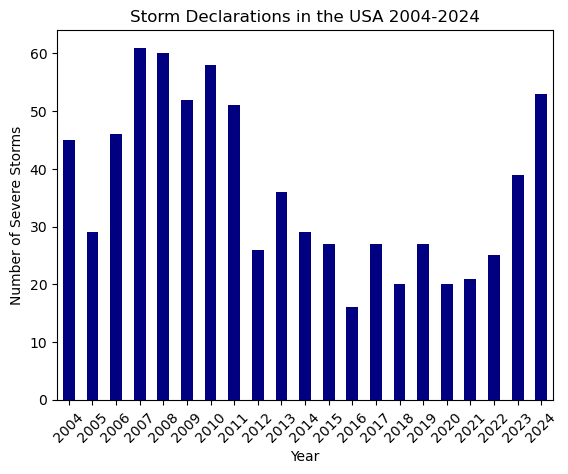

In [17]:
### SEVERE STORM + Other STORMS FREQUENCY ###
# 20-year range List
years = []
for x in range(4,25):
    year = 2000 + x
    years.append(year)

frequency = total_storm_df["Year"].value_counts().sort_index()
ax = frequency.plot(kind='bar', color= "navy")
plt.xticks(range(len(years)), rotation = 45)
plt.xlabel("Year")
plt.ylabel("Number of Severe Storms")
plt.title("Storm Declarations in the USA 2004-2024")

plt.savefig('../project-1/output/storm_frequency.png', dpi=300)
plt.show()


In [ ]:
# Pivot table for heatmap
heatmap_data1 = total_storm_df.pivot_table(index='Year', columns='incidentType', values='declarationDate', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Incidents by Year and Type')
plt.xlabel('IncidentType')
plt.ylabel('Year')
plt.show()

In [ ]:
merged = states_gdf.merge(total_storm_df, left_on='state_column', right_on='state_column', how='left')

# Step 3: Create the map
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Create the choropleth layer
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=['state_column', 'disaster_count'],  # Adjust these column names as necessary
    key_on='feature.properties.state_column',  # Adjust based on your GeoDataFrame's properties
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Disasters'
).add_to(m)

In [ ]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
total_storm_df.boundary.plot(ax=ax, linewidth=1)
total_storm_df.plot(column='disaster_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Disasters by State",
                         'orientation': "horizontal"},
            cmap='OrRd')

plt.title('Disaster Declarations by State')
plt.show()

In [10]:
#total_storm_df['obligatedRecipientMgmtAmt'] = total_storm_df['obligatedRecipientMgmtAmt'].map('${:,.2f}'.format)
#total_storm_df
grant_data = total_storm_df[["Year",'obligatedRecipientMgmtAmt']].groupby("Year").agg(['mean','sum','max','min'])
grant_data

obligatedRecipientMgmtAmt                                 
                          mean          sum          max    min
Year                                                           
2004              46364.822222   2086417.00    408623.00    0.0
2005              62019.379310   1798562.00    599019.00    0.0
2006              73566.273043   3384048.56    711904.56    0.0
2007              94042.967213   5736621.00    864230.00    0.0
2008             284810.083333  17088605.00  11155311.00    0.0
2009             178885.138077   9302027.18   2251263.40    0.0
2010             162158.156724   9405173.09   1233449.98    0.0
2011             214087.932549  10918484.56   3619065.00    0.0
2012             115355.685769   2999247.83    763072.07    0.0
2013              64991.160278   2339681.77    376774.03  359.0
2014             235203.861379   6820911.98   1692990.00    0.0
2015             191411.068519   5168098.85   1650647.00    0.0
2016             148194.939375   2371119.03    540175.00    0.0
2017             155789.130741   4206306.53   1080561.00    0.0
2018             137813.211000   2756264.22   1292226.00    0.0
2019             287010.847407   7749292.88   1352995.77    0.0
2020             179111.871500   3582237.43   1657612.51    0.0
2021             294571.540476   6186002.35   2442878.96    0.0
2022              89404.349600   2235108.74    635774.00    0.0
2023              68946.781026   2688924.46    881143.05    0.0
2024                535.848491     28399.97     28399.97    0.0

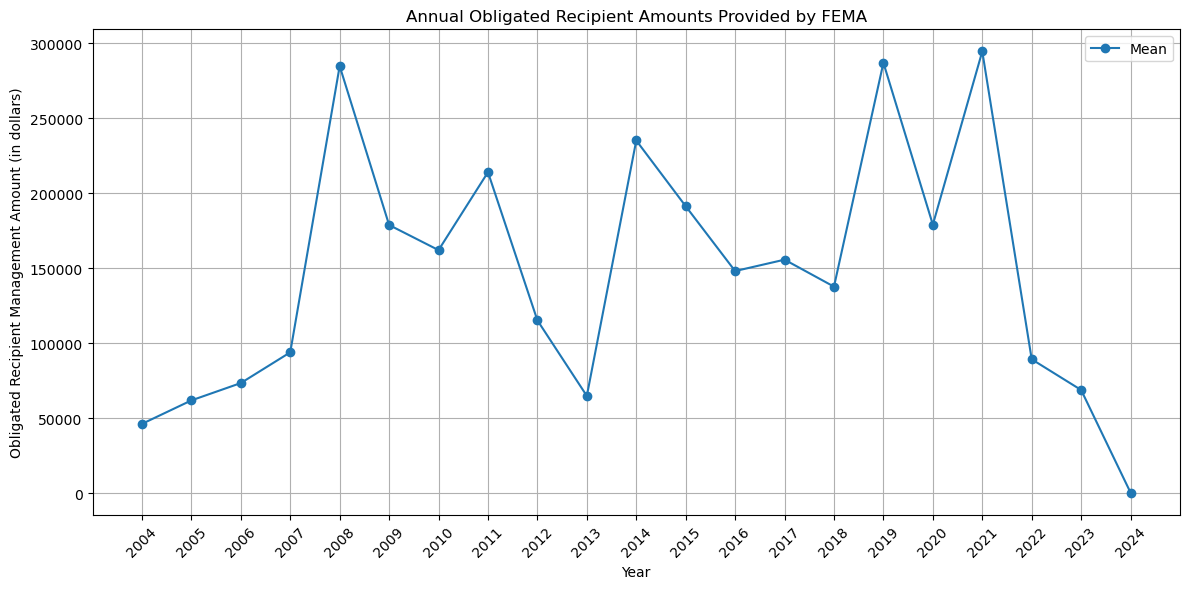

In [15]:
grant_data_reset = grant_data.reset_index()
plt.figure(figsize=(12, 6))
# Plot each line
plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'mean')], label='Mean', marker='o')
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'sum')], label='Total', marker='o')
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'max')], label='Maximum', marker='o')
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'min')], label='Minimum', marker='o')


plt.title('Annual Obligated Recipient Amounts Provided by FEMA')
plt.xlabel('Year')
plt.ylabel('Obligated Recipient Management Amount (in dollars)')
plt.xticks(grant_data_reset['Year'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

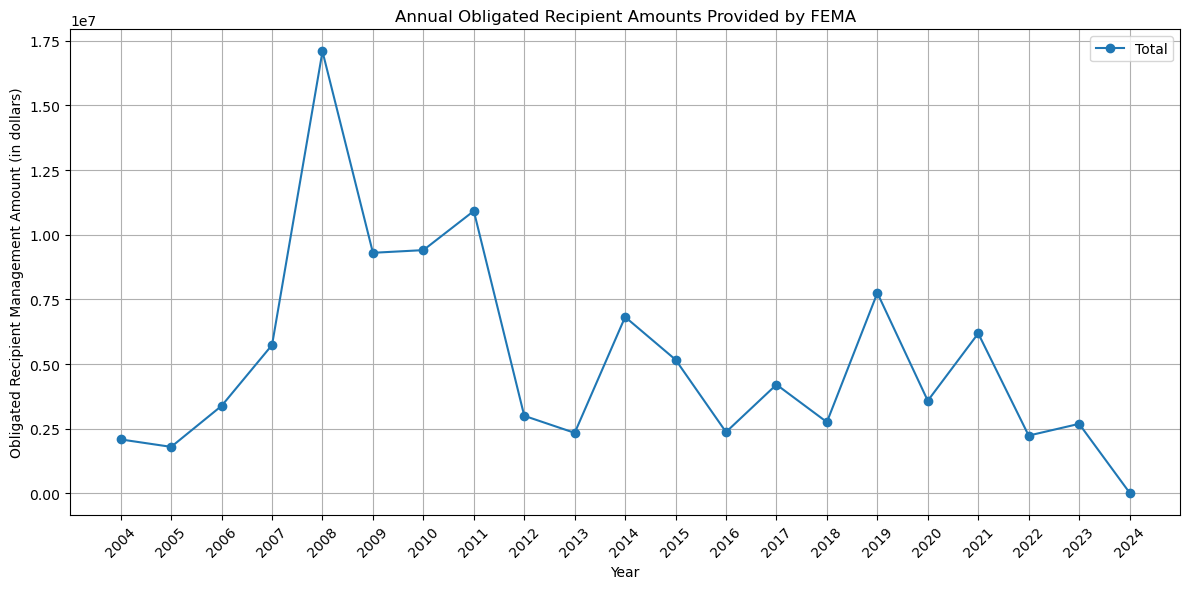

In [16]:
plt.figure(figsize=(12, 6))
# Plot each line
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'mean')], label='Mean', marker='o')
plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'sum')], label='Total', marker='o')
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'max')], label='Maximum', marker='o')
#plt.plot(grant_data_reset['Year'], grant_data_reset[('obligatedRecipientMgmtAmt', 'min')], label='Minimum', marker='o')


plt.title('Annual Obligated Recipient Amounts Provided by FEMA')
plt.xlabel('Year')
plt.ylabel('Obligated Recipient Management Amount (in dollars)')
plt.xticks(grant_data_reset['Year'], rotation=45
        
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()